# CLIP based usage 

## 1- zero shot classsification 
## 2- Image search based on text


In [1]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import numpy as np
import torch

c:\Users\1430647\Anaconda3\envs\cuda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example of zero shot classification

In [2]:
import open_clip
open_clip.list_pretrained()

[('RN50', 'openai'),
 ('RN50', 'yfcc15m'),
 ('RN50', 'cc12m'),
 ('RN50-quickgelu', 'openai'),
 ('RN50-quickgelu', 'yfcc15m'),
 ('RN50-quickgelu', 'cc12m'),
 ('RN101', 'openai'),
 ('RN101', 'yfcc15m'),
 ('RN101-quickgelu', 'openai'),
 ('RN101-quickgelu', 'yfcc15m'),
 ('RN50x4', 'openai'),
 ('RN50x16', 'openai'),
 ('RN50x64', 'openai'),
 ('ViT-B-32', 'openai'),
 ('ViT-B-32', 'laion400m_e31'),
 ('ViT-B-32', 'laion400m_e32'),
 ('ViT-B-32', 'laion2b_e16'),
 ('ViT-B-32', 'laion2b_s34b_b79k'),
 ('ViT-B-32', 'datacomp_xl_s13b_b90k'),
 ('ViT-B-32', 'datacomp_m_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_clip_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_laion_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_image_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_text_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_basic_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_s128m_b4k'),
 ('ViT-B-32', 'datacomp_s_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_clip_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_laion_s13m_b4k'),
 ('ViT-B-32', 'commonpool_

In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

c:\Users\1430647\Anaconda3\envs\cuda\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
model.eval()
print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")

processor.tokenizer

Model parameters: 151,277,313


CLIPTokenizerFast(name_or_path='openai/clip-vit-base-patch32', vocab_size=49408, model_max_length=77, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	49406: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	49407: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [5]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image)
    plt.axis('off')  # Hide the axis
    plt.show()

In [6]:
import os
images_base_path = os.path.join(os.getcwd(), "sample-images")
png_files = [f for f in os.listdir(images_base_path) if f.endswith('.png')]
for file_name in png_files:
    print(file_name)

a-laptop-with-gloass-bottles-on-top-of-machine.png
bar-on-the-beach.png
boat-on-the-beach.png
car-crossing-zebra-crossing.png
car-girl.png
car-traffic-light-night.png
car-traffic-light.png
ducks-crossing-zebra-crossing-car-waiting.png
elephant-crossing-road-person-on-bike.png
glass-bottels-on-a-machine.png
horse-camel-elephant-frame.png
horse-camel-elephant.png
horse-man-elephant-field.png
horse.png
horses-man-elephant-field.png
hotel-on-beach-day-time.png
hotel-on-beach-night-time.png
hotel-room-windows-showing-beach.png
kids-crossing-zebra-crossing.png
swimming-pool-with-cottage.png
swimming-ppol-near-to-beach.png
woman-man-crossing-zebra-crossing.png


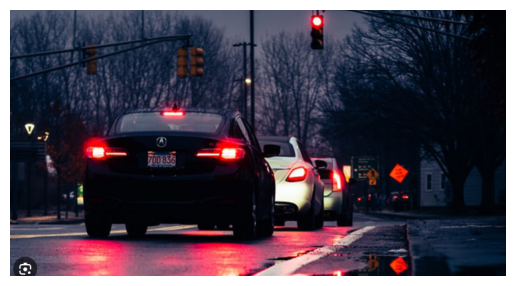

401 747


In [7]:
SELECTED_IMAGE = "car-traffic-light-night.png"
image = Image.open(os.path.join(images_base_path, SELECTED_IMAGE))
show_image(image)
print(image.height, image.width)

In [8]:
images_description= ["a photo of a bar on beach",
                        "a photo of a elephant",
                        "a photo of a camel, horse and elephant",
                        "In night a car at traffic light",
                        "a photo of a camel and tiger", 
                        "A man riding horse next to elephant",
                        "An elephant with horse in a deserted land",
                        "In day time, a car at traffic light",
                        "In evening time, a car at traffic signal",
                        "beach ",
                        "bike",
                        "cars stopped at signals in a rainy day",
                        "ducks with cars",
                        "a zebra crossing with cars"]



In [9]:
with torch.no_grad():
    inputs = processor(text=images_description, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)

logits_per_image = outputs.logits_per_image
logits_per_image

tensor([[13.7123, 19.0856, 16.5823, 25.4476, 18.0746, 16.5121, 14.2217, 26.4581,
         27.6444, 17.5384, 19.2524, 30.1040, 21.3544, 25.7208]])

In [10]:
probs = logits_per_image.softmax(dim=1)
probs
top_probs, top_labels = probs.cpu().topk(4, dim=-1)
print(top_probs)
top_labels = list(top_labels[0].cpu())
print(top_labels)


tensor([[0.8820, 0.0754, 0.0230, 0.0110]])
[tensor(11), tensor(8), tensor(7), tensor(13)]


### First four zero shot classification results

In [11]:
print(images_description[int(top_labels[0])])
print(images_description[int(top_labels[1])])
print(images_description[int(top_labels[2])])
print(images_description[int(top_labels[3])])

cars stopped at signals in a rainy day
In evening time, a car at traffic signal
In day time, a car at traffic light
a zebra crossing with cars


## Image Search

In [12]:
all_images = []

for file_name in png_files:
    all_images.append(Image.open(os.path.join(images_base_path, file_name)))

print(f"Count of images: {len(all_images)}")

Count of images: 22


In [13]:
SEARCH_PHRASES = ["zebra crossing"]

In [14]:
with torch.no_grad():
    inputs = processor(text=SEARCH_PHRASES,
                    images=all_images, return_tensors="pt", padding=True)
    outputs = model(**inputs)

In [15]:
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

print(logits_per_image.shape, probs.shape)

torch.Size([22, 1]) torch.Size([22, 1])


In [16]:
# Filter the scores and return indices
values, indices = logits_per_image.squeeze().topk(3) # Top-3

top_images, top_scores = [], []
top_indexes = []

for score, index in zip(values, indices):
    top_indexes.append(int(index.numpy()))
    top_images.append(all_images[int(index.numpy())])
    score = score.numpy().tolist()
    top_scores.append(round(score, 3))

In [17]:
print (f"Scores: {top_scores}")
for index in top_indexes:
    print(png_files[index])


Scores: [29.57, 29.141, 26.032]
woman-man-crossing-zebra-crossing.png
car-crossing-zebra-crossing.png
ducks-crossing-zebra-crossing-car-waiting.png



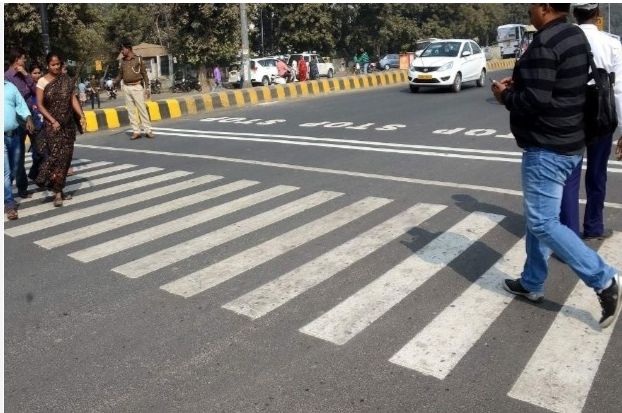
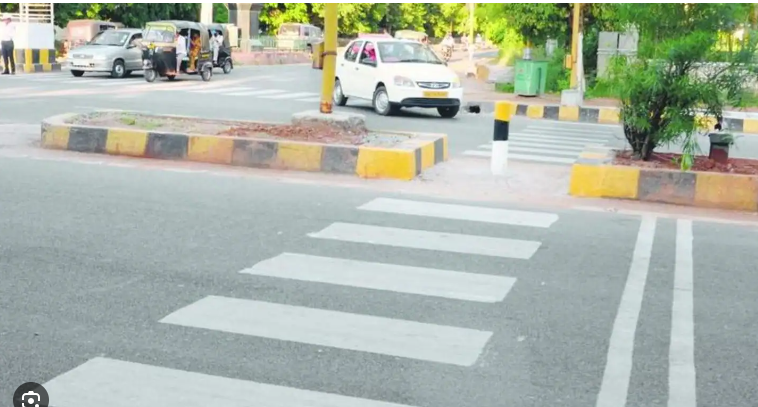
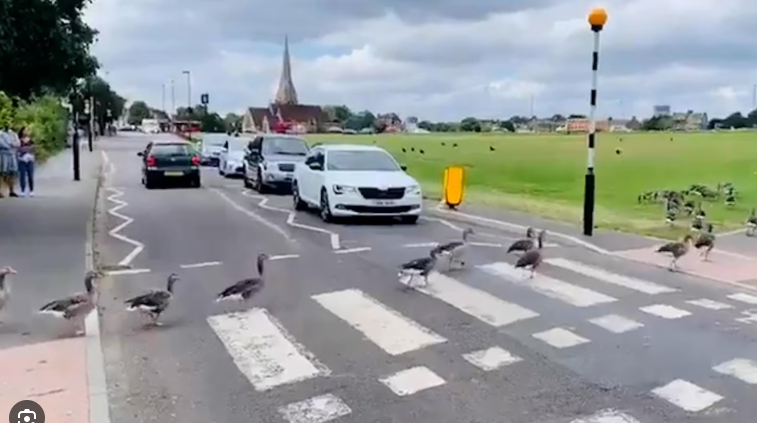


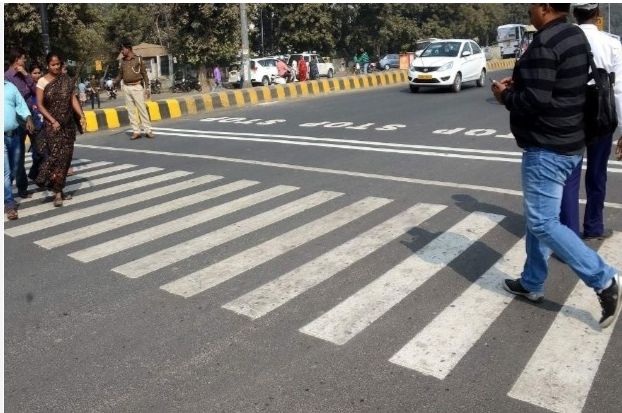
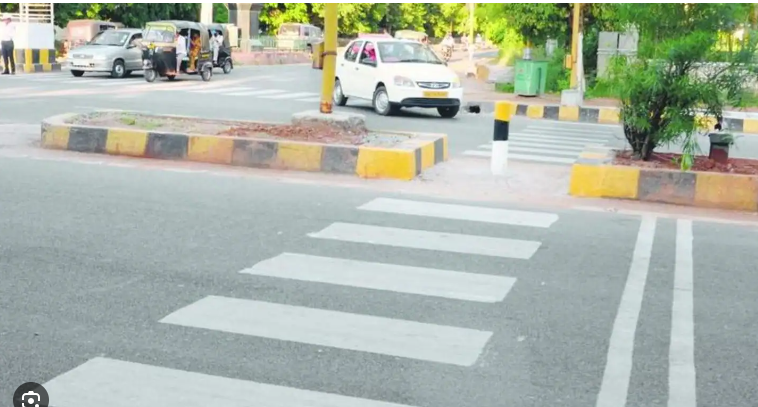
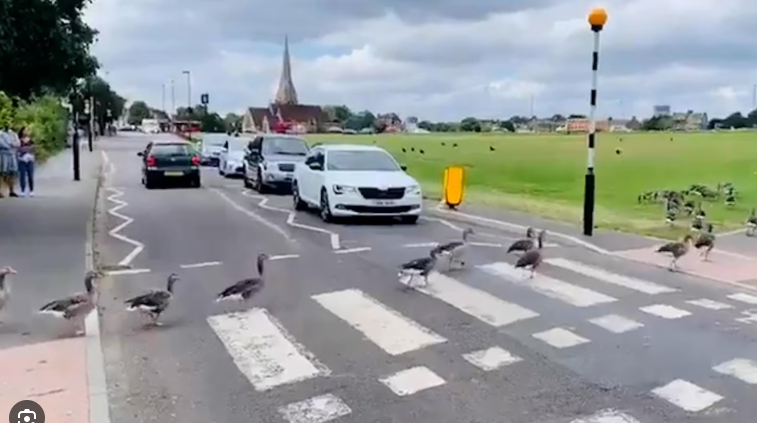

In [18]:
import ipyplot
ipyplot.plot_images(top_images, img_width=300)

### References

- https://huggingface.co/docs/transformers/main/en/model_doc/clip
- https://github.com/mlfoundations/open_clip
- https://github.com/mlfoundations/open_clip/tree/main/docs
- https://viso.ai/deep-learning/clip-machine-learning/
- https://openai.com/index/clip/